In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('redwine.csv')

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.shape

(1599, 12)

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# EDA

In [13]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [14]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

quality has most values concentrated in the categories of 5,6,7

<AxesSubplot:>

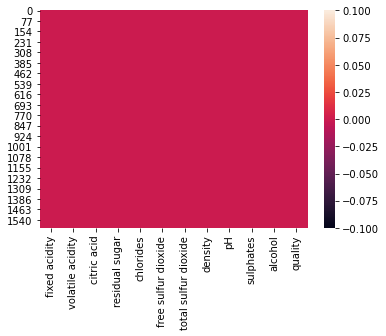

In [15]:
#to check missing values
sns.heatmap(df.isnull())

no missing values

# Correlation

In [16]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

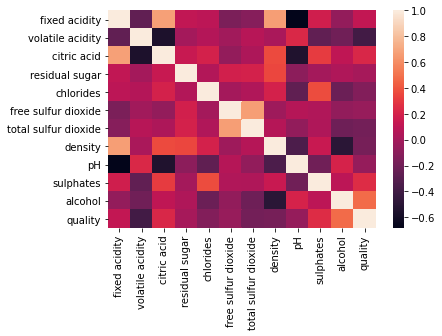

In [17]:
sns.heatmap(dfcor)

<AxesSubplot:>

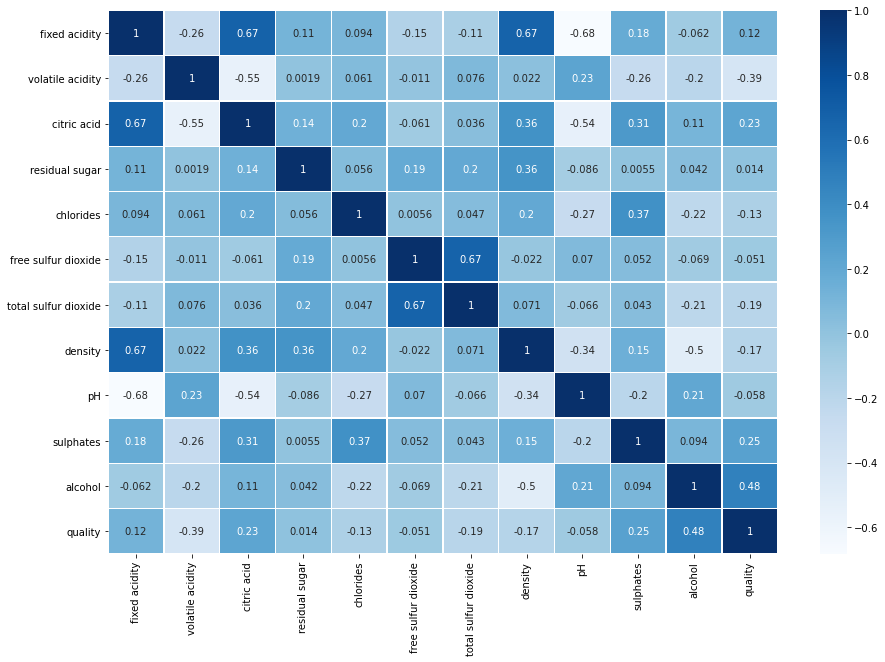

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap='Blues',annot=True,linewidth=.3)

In [22]:
dfcor['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='count'>

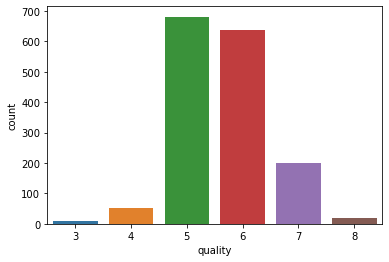

In [23]:
sns.countplot(df['quality'])

Here we can see most of samples of wine around 600 to 700 relay in no 5 & 6 and around 200 in no. 7 and more which is count as good wine

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

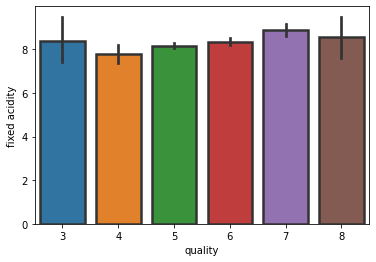

In [24]:
sns.barplot(x='quality',y='fixed acidity', linewidth=2.5, errcolor=".2", edgecolor=".2", data=df)

we can see here fixed acidity is almost common in all the samaples of wine means it doesn't affect the quality of wine that much

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

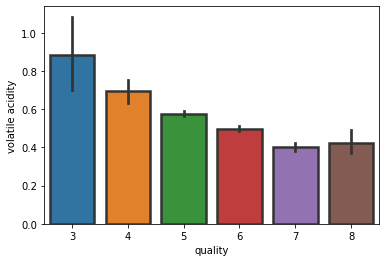

In [25]:
sns.barplot(x='quality',y='volatile acidity', linewidth=2.5, errcolor=".2", edgecolor=".2", data=df)

less volatile acidity improves the wine quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

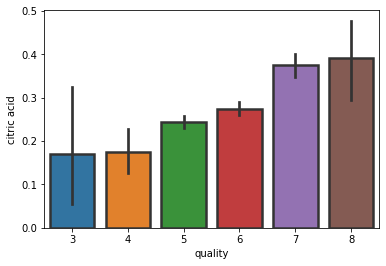

In [26]:
sns.barplot(x='quality',y='citric acid', linewidth=2.5, errcolor=".2", edgecolor=".2", data=df)

Here citric acid has a huge impact on qaulity of wine, increasing citric acid also improves the quality of wine

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

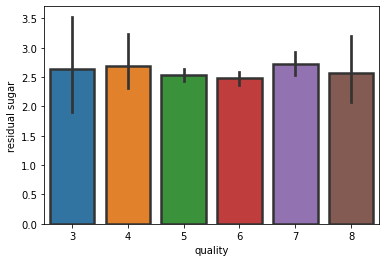

In [27]:
sns.barplot(x='quality',y='residual sugar', linewidth=2.5, errcolor=".2", edgecolor=".2", data=df)

There is no huge impact of residual sugar on quality of wine it's almost common in all qualities.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

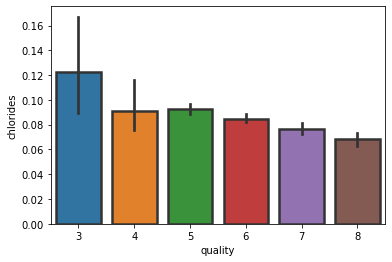

In [28]:
sns.barplot(x='quality',y='chlorides', linewidth=2.5, errcolor=".2", edgecolor=".2", data=df)

here chlorides has a little impact on quality if it decrease that improves little of wine quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

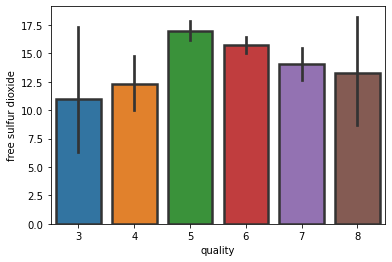

In [29]:
sns.barplot(x='quality',y='free sulfur dioxide', linewidth=2.5, errcolor=".2", edgecolor=".2", data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

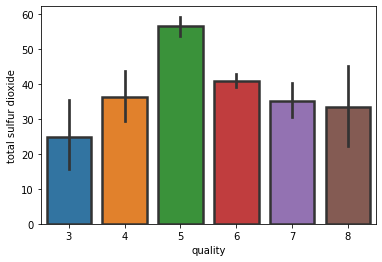

In [30]:
sns.barplot(x='quality',y='total sulfur dioxide', linewidth=2.5, errcolor=".2", edgecolor=".2", data=df)

total sulfur dioxide and free sulfur dioxide having both kind of impact on quality positive and negative

<AxesSubplot:xlabel='quality', ylabel='density'>

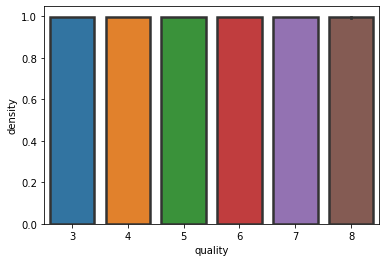

In [31]:
sns.barplot(x='quality',y='density', linewidth=2.5, errcolor=".2", edgecolor=".2", data=df)

there is no relation between density and quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

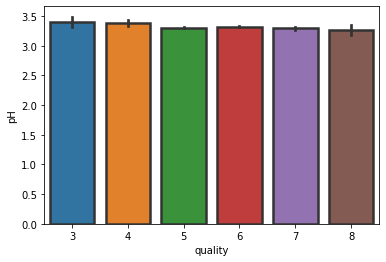

In [32]:
sns.barplot(x='quality',y='pH', linewidth=2.5, errcolor=".2", edgecolor=".2", data=df)

no huge relation between pH and quality as well, there is very minor effect

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

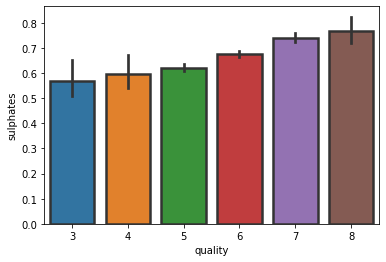

In [33]:
sns.barplot(x='quality',y='sulphates', linewidth=2.5, errcolor=".2", edgecolor=".2", data=df)

notice sulphates improves the quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

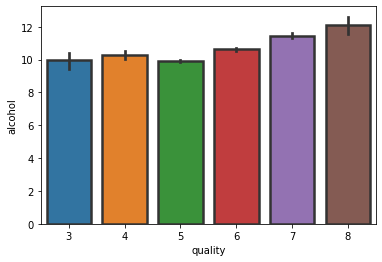

In [34]:
sns.barplot(x='quality',y='alcohol', linewidth=2.5, errcolor=".2", edgecolor=".2", data=df)

there is little impact of alcohol as well on quality of wine ,increasing alcohol is also improving wine quality

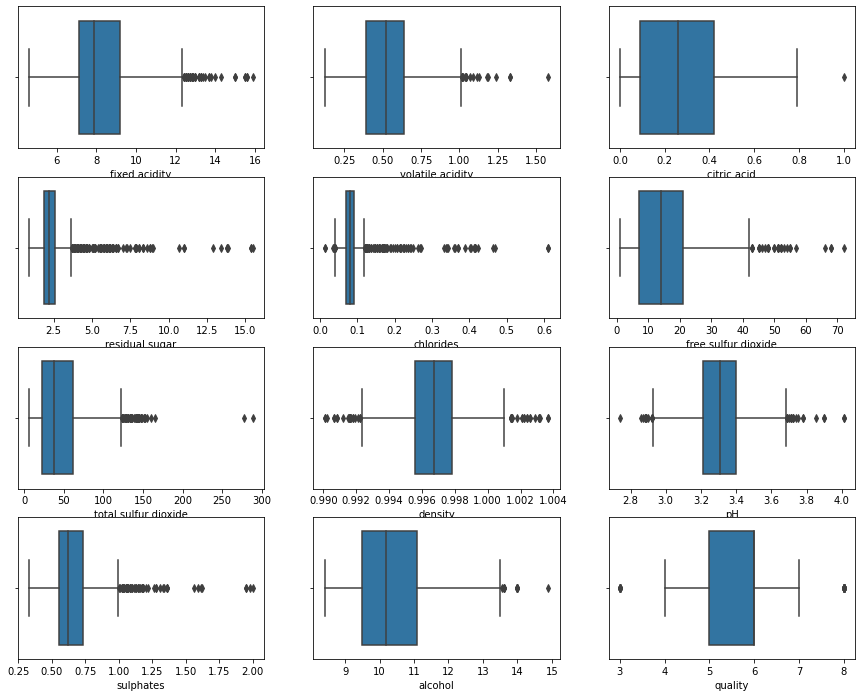

In [35]:
#checking for outliers
plt.figure(figsize=(15,12))
for o in enumerate(df.columns):
    plt.subplot(4,3,o[0]+1)
    sns.boxplot(df[o[1]])

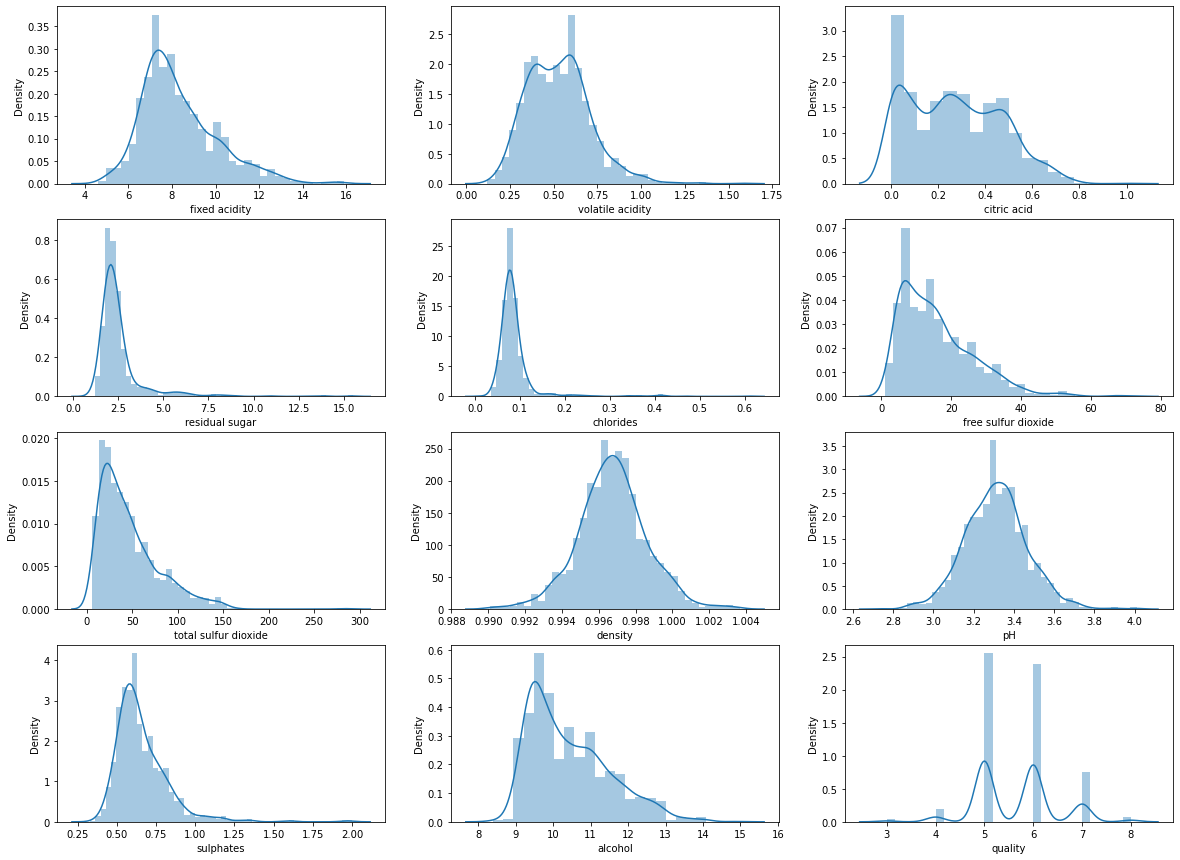

In [36]:
#checking for skewness
plt.figure(figsize=(20,15))
for o in enumerate(df.columns):
    plt.subplot(4,3,o[0]+1)
    sns.distplot(df[o[1]])

In [37]:
#Removing outliers
#Using ZScore Mehod
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [38]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [39]:
# rows and column

z[13][8]

0.3311766102216806

In [40]:
z[15][5]

3.359038194288537

In [41]:
z[1589][2]

0.36446303582288697

In [42]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (1599, 12)
After removing outliers:: (1451, 12)


In [43]:
#Using IQR Method
from scipy import stats 
IQR = stats.iqr(df) 
IQR

8.31

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [45]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(1233, 12)


In [46]:
df=df_1

In [47]:
df.shape

(1451, 12)

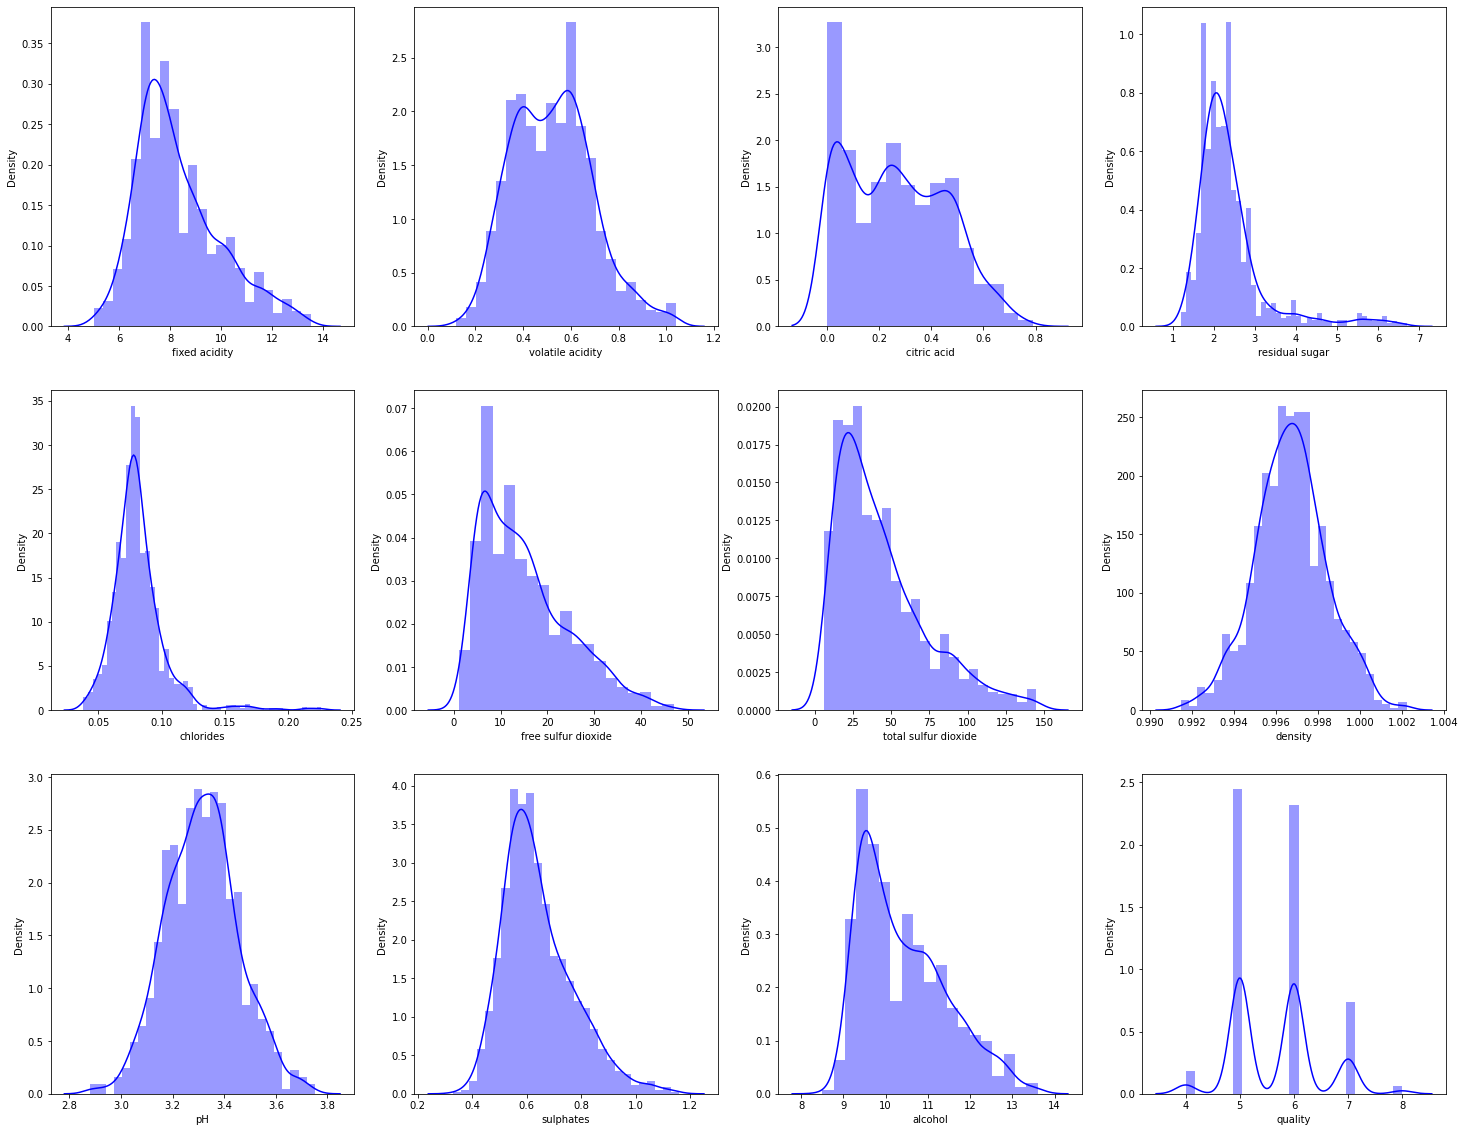

In [48]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [49]:
df.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [50]:
from sklearn.preprocessing import power_transform

df[['fixed acidity','free sulfur dioxide','residual sugar','chlorides','total sulfur dioxide','sulphates','alcohol']]=power_transform(df[['fixed acidity','free sulfur dioxide','residual sugar','chlorides','total sulfur dioxide','sulphates','alcohol']],method='yeo-johnson')

In [51]:
df.skew()

fixed acidity           0.018666
volatile acidity        0.380659
citric acid             0.291297
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                 0.055738
pH                      0.114705
sulphates               0.020799
alcohol                 0.114658
quality                 0.407865
dtype: float64

In [52]:
#converting target variable into categorical column

(df['quality']<7).value_counts()

True     1250
False     201
Name: quality, dtype: int64

In [53]:
(df['quality']>=7).value_counts()

False    1250
True      201
Name: quality, dtype: int64

In [54]:
df.loc[(df['quality'] < 7.0),'quality']=0.0
df.loc[(df['quality'] >= 7.0),'quality']=1

0    1250
1     201
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

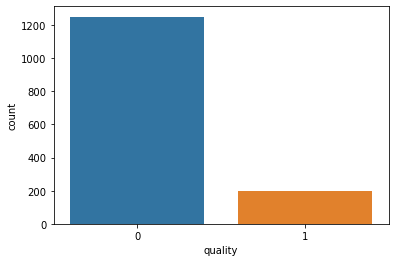

In [55]:
print(df.quality.value_counts())
sns.countplot(df['quality'])

# Splitting and Scaling

In [56]:
x=df.drop(['quality'],axis=1)
y=df['quality']

In [57]:
x.shape

(1451, 11)

In [58]:
y.shape

(1451,)

In [59]:
# Oversampling the data
from imblearn.over_sampling import RandomOverSampler

In [60]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x,y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_ros.shape)

original  Target dataset shape: (1451,)
Resample Target dataset shape (2500,)


In [61]:
x_ros.shape

(2500, 11)

In [62]:
y_ros.value_counts()

0    1250
1    1250
Name: quality, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=.23,random_state=42)

In [65]:
x_train.shape

(1925, 11)

In [66]:
x_test.shape

(575, 11)

In [67]:
y_train.shape

(1925,)

In [68]:
y_test.shape

(575,)

# Model Building

In [69]:
#LogisticRegression
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_ros,y_ros,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(logreg_score))

cross validation score for svm: 0.7856


In [70]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7895652173913044
[[215  66]
 [ 55 239]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       281
           1       0.78      0.81      0.80       294

    accuracy                           0.79       575
   macro avg       0.79      0.79      0.79       575
weighted avg       0.79      0.79      0.79       575

Training accuracy:: 0.8051948051948052
Test accuracy:: 0.7895652173913044


In [71]:
#Decisiontreeclassifier
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_ros,y_ros,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.9324


In [72]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.9669565217391304
[[262  19]
 [  0 294]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       281
           1       0.94      1.00      0.97       294

    accuracy                           0.97       575
   macro avg       0.97      0.97      0.97       575
weighted avg       0.97      0.97      0.97       575

Training accuracy:: 1.0
Test accuracy:: 0.9669565217391304


In [73]:
#KNeighborsClassifier
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_ros,y_ros,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.86


In [74]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.8939130434782608
[[223  58]
 [  3 291]]
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       281
           1       0.83      0.99      0.91       294

    accuracy                           0.89       575
   macro avg       0.91      0.89      0.89       575
weighted avg       0.91      0.89      0.89       575

Training accuracy:: 0.9205194805194805
Test accuracy:: 0.8939130434782608


In [75]:
#RandomForestClassifier
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_ros,y_ros,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.9524000000000001


In [76]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.9721739130434782
[[265  16]
 [  0 294]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       281
           1       0.95      1.00      0.97       294

    accuracy                           0.97       575
   macro avg       0.97      0.97      0.97       575
weighted avg       0.97      0.97      0.97       575

Training accuracy:: 1.0
Test accuracy:: 0.9721739130434782


# ENSEMBLE TECHNIQUES

In [77]:
#1.ADA BOOST CLASSIFIER
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_ros,y_ros,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8560000000000001


In [78]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8556521739130435
[[233  48]
 [ 35 259]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       281
           1       0.84      0.88      0.86       294

    accuracy                           0.86       575
   macro avg       0.86      0.86      0.86       575
weighted avg       0.86      0.86      0.86       575

Training accuracy:: 0.8914285714285715
Test accuracy:: 0.8556521739130435


In [79]:
#BAGGING CLASSIFIER
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_ros,y_ros,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.9623999999999999


In [80]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.9739130434782609
[[266  15]
 [  0 294]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       281
           1       0.95      1.00      0.98       294

    accuracy                           0.97       575
   macro avg       0.98      0.97      0.97       575
weighted avg       0.98      0.97      0.97       575

Training accuracy:: 0.9989610389610389
Test accuracy:: 0.9739130434782609


In [81]:
#Gradient Boosting classifier
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_ros,y_ros,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.906


In [82]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.9269565217391305
[[247  34]
 [  8 286]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       281
           1       0.89      0.97      0.93       294

    accuracy                           0.93       575
   macro avg       0.93      0.93      0.93       575
weighted avg       0.93      0.93      0.93       575

Training accuracy:: 0.9522077922077922
Test accuracy:: 0.9269565217391305


BAGGING CLASSIFIER as final model

# HYPER PARAMETER TUNING

In [83]:
bgc=BaggingClassifier()
param_grid={
    'n_estimators':[100,200],
    'max_features':[1,2],
    'random_state':[20],
    'max_samples':[1.0]
}

In [84]:
bgc_grid=GridSearchCV(BaggingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [85]:
bgc_grid.fit(x_train,y_train)
bgc_pred=bgc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,bgc_pred))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Accuracy after parameter tuning:: 0.9930434782608696


# Report of BaggingClassifier

In [86]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,bgc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       281
           1       0.99      1.00      0.99       294

    accuracy                           0.99       575
   macro avg       0.99      0.99      0.99       575
weighted avg       0.99      0.99      0.99       575



<AxesSubplot:>

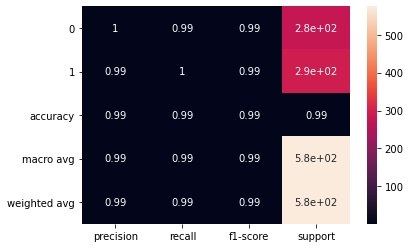

In [87]:
clsf_repo = classification_report(y_test,bgc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [88]:
from sklearn.metrics import roc_auc_score

In [89]:
print("roc auc score::",roc_auc_score(y_test, bgc_pred))

roc auc score:: 0.9929612414360762


In [90]:
from sklearn.metrics import roc_curve

In [91]:
fpr1, tpr1, thresh1 = roc_curve(y_test, bgc_pred, pos_label=1)

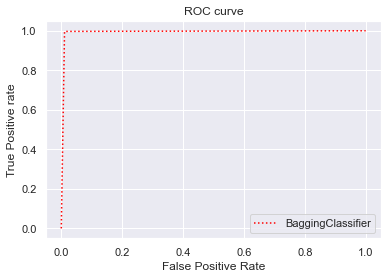

In [92]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle=':',color='red', label='BaggingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [93]:
import joblib

In [94]:
joblib.dump(bgc_grid.best_estimator_,'Red_Wine_Quality-Project.obj')

['Red_Wine_Quality-Project.obj']